# Importar librerías y habilitar uso de drive

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import time
import pickle
from scipy.interpolate import interp1d
from google.colab import drive
drive.mount('/content/gdrive')
from ipywidgets import interact
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Cargar base de datos sin procesar

Cargar datos con **pickle**. Series de tiempo sin outliers de error sistemático. Falta eliminar outliers con un criterio estadístico.

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
# ruta_base='gdrive/My Drive/Proyecto/BaseDatos'
with open(ruta_base+'/datos.pkl','rb') as f: 
    datos = pickle.load(f)

In [0]:
Nombres, Periodo, Clase1, Clase2 = datos[0], datos[1], datos[2], datos[3]
timeB, timeR, magB, magR, errB, errR = datos[4], datos[5], datos[6], datos[7], datos[8], datos[9]

**Clase1** define si es Cefeida, Binaria eclipsante o RR Lyrae. **Clase2** define la sub clase dentro de las que se encuentran en Clase1

In [0]:
with open('clases.pkl','wb') as f:
  pickle.dump([Nombres, Clase1, Clase2, Periodo],f)

# Preprocesamiento de datos

## Eliminar outliers

Se eliminan aquellos datos con magnitud mayor que la **media** más** 2 desviaciones** estándar y menores a la **media** menos **2 desviaciones** estándar.

Visualización de 1 curva con outliers

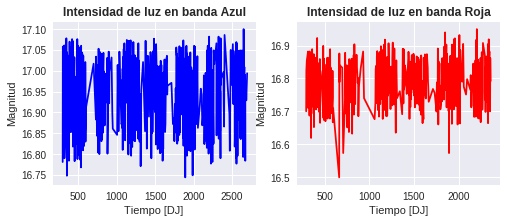

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(timeB[0],magB[0],'b')
ax[0].set_xlabel('Tiempo [DJ] ')
ax[0].set_ylabel('Magnitud')
#ax[0].set_ylim(16.7,17.15)
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(timeR[0],magR[0],'r')
ax[1].set_xlabel('Tiempo [DJ]')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

fig.savefig('con_outliers.eps',format='eps')

Función que elimina ouliers

In [0]:
def remove_outliers(time,mag,err):
  mu = np.mean(np.array(mag))
  sd = np.std(np.array(mag))
  for i in range(len(mag)):
    if np.greater(np.array(mag[i]),mu+2*sd): # mag[i]>mu+2*sd
      mag[i]='del'
      time[i]='del'
      err[i]='del'
    if np.greater(mu-2*sd,np.array(mag[i])):# mag[i]<mu-2*sd
      mag[i]='del'
      time[i]='del'
      err[i]='del'
  
  while mag.count('del')!=0:
    mag.remove('del')
  while time.count('del')!=0:
    time.remove('del')
  while err.count('del')!=0:
    err.remove('del')
    

Eliminar outliers en la banda Roja y Azul

In [0]:
for i in range(len(Nombres)):
  remove_outliers(timeB[i],magB[i],errB[i])
  remove_outliers(timeR[i],magR[i],errR[i])


Visualización de 1 curva sin outliers bajo el criterio estadístico

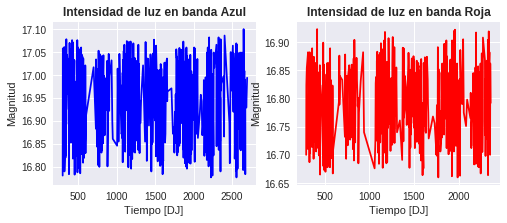

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(timeB[0],magB[0],'b')
ax[0].set_xlabel('Tiempo [DJ] ')
ax[0].set_ylabel('Magnitud')
#ax[0].set_ylim(16.7,17.15)
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(timeR[0],magR[0],'r')
ax[1].set_xlabel('Tiempo [DJ]')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

fig.savefig('sin_outliers.eps',format='eps')

Guardar los datos sin outliers en archivo **.pkl**

In [0]:
with open('datos_sin_outliers.pkl','wb') as f:
  pickle.dump([timeB ,magB ,errB ,timeR ,magR ,errR],f)

## Curvas de luz: Doblado del tiempo y normalización

Cargar datos sin outliers

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
with open(ruta_base+'/datos_sin_outliers.pkl','rb') as f:
  sin_outliers = pickle.load(f)
  
with open(ruta_base+'/clases.pkl','rb') as f:
  datos = pickle.load(f)

In [0]:
timeB, magB, errB = sin_outliers[0], sin_outliers[1], sin_outliers[2]
timeR, magR, errR = sin_outliers[3], sin_outliers[4], sin_outliers[5]
Nombres, Clase1, Clase2, Periodo = datos[0], datos[1], datos[2], datos[3]

Grafico sin procesar de cada curva

Text(0.5,1,'Intensidad de luz en banda Roja')

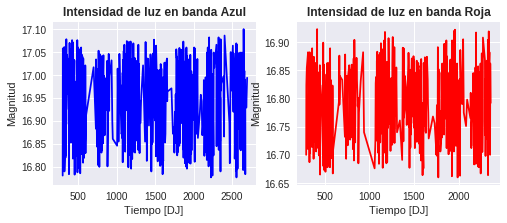

In [11]:
i=0
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(timeB[i],magB[i],'b')
ax[0].set_xlabel('Tiempo [DJ] ')
ax[0].set_ylabel('Magnitud')
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(timeR[i],magR[i],'r')
ax[1].set_xlabel('Tiempo [DJ]')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

Reordenar datos y graficar en fase

In [0]:
for i in range(len(Nombres)):
  timeR[i]=np.array(timeR[i])
  timeR[i]=(timeR[i]%Periodo[i])/Periodo[i] # se calcula la fase asociada a ese valor
  ind = np.argsort(timeR[i]) # ordenar las fases, se obtiene la secuencia de indices
  magR[i]=np.array(magR[i])
  magR[i]=magR[i][ind] # reordenar los valores
  timeR[i]=timeR[i][ind]
  

  
for i in range(len(timeB)):
  timeB[i]=np.array(timeB[i])
  timeB[i]=(timeB[i] % Periodo[i])/Periodo[i] # se calcula la fase asociada a ese valor
  ind=np.argsort(timeB[i]) # ordenar las fases, se obtiene la secuencia de indices
  magB[i]=np.array(magB[i])
  magB[i]=magB[i][ind] # reordenar los valores
  timeB[i]=timeB[i][ind]

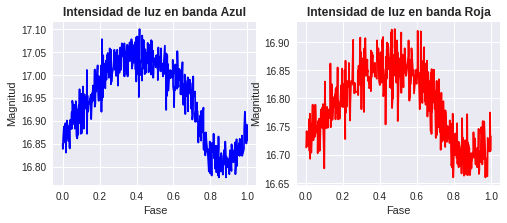

In [13]:
i=0
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(timeB[i],magB[i],'b')
ax[0].set_xlabel('Fase')
ax[0].set_ylabel('Magnitud')
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(timeR[i],magR[i],'r')
ax[1].set_xlabel('Fase')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

#fig.savefig('LC_ruidosa.eps',format='eps')

Normalización

In [0]:
for i in range(len(timeB)):
  magR[i]=(magR[i]-min(magR[i]))/(max(magR[i])-min(magR[i])) # normalización entre 0 y 1
  magB[i]=(magB[i]-min(magB[i]))/(max(magB[i])-min(magB[i])) # normalización entre 0 y 1

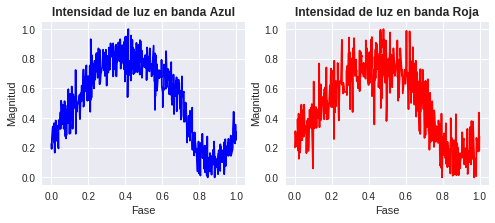

In [15]:
i=0
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(timeB[i],magB[i],'b')
ax[0].set_xlabel('Fase')
ax[0].set_ylabel('Magnitud')
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(timeR[i],magR[i],'r')
ax[1].set_xlabel('Fase')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

fig.savefig('LC_ruidosa.eps',format='eps')

Función para suavizar curvas

In [0]:
def smooth(x, window_len, window):
    if window_len < 3:
        return x
    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")
    s=np.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')
    y=np.convolve(w/w.sum(),s,mode='valid')
    return y 

In [0]:
for i in range(len(Nombres)):
  magB[i]=smooth(magB[i],11,'hanning')
  magR[i]=smooth(magR[i],11,'hanning')

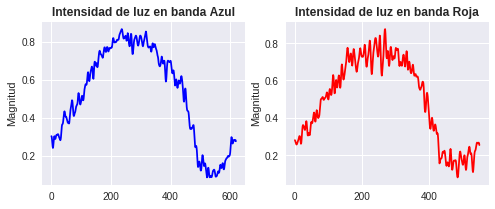

In [19]:
i=0
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(magB[i],'b')
ax[0].set_ylabel('Magnitud')
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(magR[i],'r')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

fig.savefig('LC_suavizada.eps',format='eps')

Interpolar datos para que todas las curvas tengan un tamaño de 30 datos

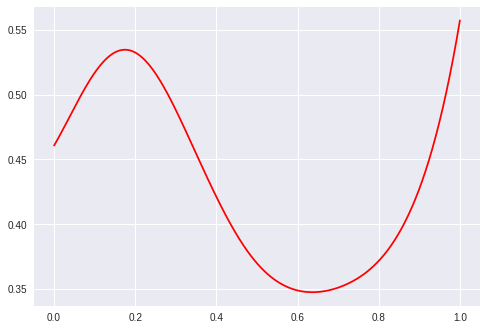

In [0]:
# Interpolacion
def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0]
    X = np.c_[np.ones(len(X)), X]

    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau)
    beta = np.linalg.pinv(xw @ X) @ xw @ Y

    # predict value
    return x0 @ beta
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))

tau = 0.09
  
# Datos por interpolar  
for i in range(len(Nombres)):  
  X = np.linspace(0,1,len(magB[i]))
  Y = magB[i]

domain = X
prediction = [local_regression(x0, X, Y, tau) for x0 in domain]


plt.plot(domain, prediction, color='red')

In [0]:
from scipy.interpolate import CubicSpline
for i in range(len(Nombres)):
  X = np.linspace(0,1,len(smooth(magB[i],11,'hanning')))
  Y = smooth(magB[i],11,'hanning')
  X_interp = CubicSpline(X,Y)
  X_definitivo = np.linspace(X[0],X[len(X)-1],30)
  magB[i] = X_interp(X_definitivo)
  
for i in range(len(Nombres)):
  X = np.linspace(0,1,len(smooth(magR[i],11,'hanning')))
  Y = smooth(magR[i],11,'hanning')
  X_interp = CubicSpline(X,Y)
  X_definitivo = np.linspace(X[0],X[len(X)-1],30)
  magR[i] = X_interp(X_definitivo)
  

Text(0.5,1,'Intensidad de luz en banda Roja')

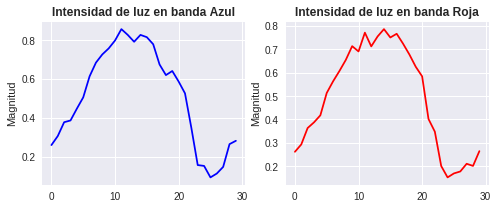

In [0]:
i=0
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(magB[i],'b')
ax[0].set_ylabel('Magnitud')
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(magR[i],'r')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

Normalizar nuevamente

In [0]:
for i in range(len(timeB)):
  magR[i]=(magR[i]-min(magR[i]))/(max(magR[i])-min(magR[i])) # normalización entre 0 y 1
  magB[i]=(magB[i]-min(magB[i]))/(max(magB[i])-min(magB[i])) # normalización entre 0 y 1

Text(0.5,1,'Intensidad de luz en banda Roja')

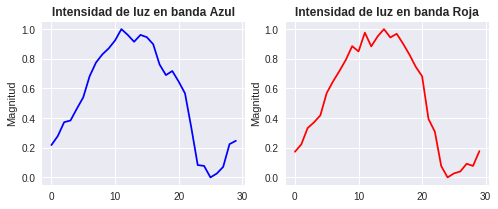

In [22]:
i=0
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(magB[i],'b')
ax[0].set_ylabel('Magnitud')
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(magR[i],'r')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

Iniciar curva en un máximo

In [0]:
for i in range(len(magB)):
  Fase=np.linspace(0,1,len(magB[0]))
  phase_max=Fase[np.argmax(magB[i])]
  Fase=Fase-phase_max
  Fase=Fase%1
  ind = np.argsort(Fase) # ordenar las fases, se obtiene la secuencia de indices
  magB[i]=np.array(magB[i])
  magB[i]=magB[i][ind]
  #Fase=Fase[ind]
  
for i in range(len(magR)):
  Fase=np.linspace(0,1,len(magR[0]))
  phase_max=Fase[np.argmax(magR[i])]
  Fase=Fase-phase_max
  Fase=Fase%1
  ind = np.argsort(Fase) # ordenar las fases, se obtiene la secuencia de indices
  magR[i]=np.array(magR[i])
  magR[i]=magR[i][ind]
  #Fase=Fase[ind]

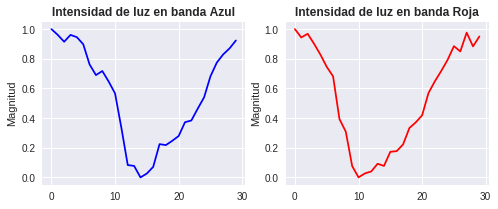

In [25]:
i=0
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].plot(magB[i],'b')
ax[0].set_ylabel('Magnitud')
ax[0].set_title('Intensidad de luz en banda Azul', fontweight='bold')

ax[1].plot(magR[i],'r')
ax[1].set_ylabel('Magnitud')
ax[1].set_title('Intensidad de luz en banda Roja', fontweight='bold')

fig.savefig('LC_interpolada.eps',format='eps')

In [0]:
with open('LC_fase_B.pkl','wb') as f:
  pickle.dump(magB,f)

In [0]:
with open('LC_fase_R.pkl','wb') as f:
  pickle.dump(magR,f)

In [0]:
i=28600
from scipy.interpolate import CubicSpline
#x = input('ingrese nombre de datos en x: ')
#y = input('ingrese nombre de datos en y: ')

X = np.linspace(0,1,len(smooth(magB[i],window_len=11, window='hanning')))
Y = smooth(magB[i],window_len=11, window='hanning')

X_interp = CubicSpline(X, Y)#, kind='linear')
X_definitivo = np.linspace(X[0],X[len(X)-1],30)
Y_definitivo = X_interp(X_definitivo)

# Grafica de datos interpolados

plt.plot(X, Y, '--*m', label='puntos experimentales')
plt.plot(X_definitivo, Y_definitivo, 'b', label='interpolacion')
plt.xlabel('Fase')
plt.ylabel('Magnitud')
plt.title (x + ' ' + 'vs' + ' ' + y)
plt.legend(loc='upper right')
plt.ylim(0, 1) 
# plt.savefig('AUCvsC.jpg')
plt.show()

#Extracción de características con FATS

## Instalar FATS

Instalar **FATS-2.0**. Se instala además **P4J** y **2to3** pues un error que se presentó fue que algunos módulos de FATS-2.0 estaban en *python 2*. 
Se corrigen tales módulos en las últimas 2 lineas.

In [0]:
!git clone https://github.com/jonwihl/FATS-2.0.git
import sys
sys.path.append('FATS-2.0')
!pip install P4J
!pip install 2to3
!cd FATS-2.0/FATS; 2to3 -w Base.py Feature.py FeatureFunctionLib.py PreprocessLC.py __init__.py
!cd FATS-2.0/FATS; 2to3 -w alignLC.py featureFunction.py lomb.py profile_action.py unitTests.py test_library.py

In [0]:
import FATS

## Obtención de características

Cargar datos con pickle

In [0]:
ruta_base='gdrive/My Drive/Inteligencia Computacional/Proyecto/BaseDatos'
with open(ruta_base+'/datos_sin_outliers.pkl','rb') as f:
  datos_sin_out = pickle.load(f)

In [0]:
timeB, magB, errB = datos_sin_out[0], datos_sin_out[1], datos_sin_out[2]
timeR, magR, errR = datos_sin_out[3], datos_sin_out[4], datos_sin_out[5]

In [0]:
LC_B = []
LC_R = []
for i in range(len(timeB)):
  LC_B.append(np.array([magB[i], timeB[i], errB[i]]))
  LC_R.append(np.array([magR[i], timeR[i], errR[i]]))

Lista de características a calcular

In [0]:
# Lista de prueba
fList_0 = ['FluxPercentileRatioMid20','FluxPercentileRatioMid35',
           'FluxPercentileRatioMid50','FluxPercentileRatioMid65',
           'FluxPercentileRatioMid80','Freq1_harmonics_amplitude_0']

# Todas las características a calcular con sólo una banda de color
# usando mag, time y error.

fList_1= ['Amplitude', 'AndersonDarling', 'Autocor_length', 'Beyond1Std', 'CAR_sigma',
         'CAR_mean', 'CAR_tau', 'Con','Eta_e', 'FluxPercentileRatioMid20',
         'FluxPercentileRatioMid35', 'FluxPercentileRatioMid50',
         'FluxPercentileRatioMid65','FluxPercentileRatioMid80',
         'Freq1_harmonics_amplitude_0','LinearTrend','MaxSlope','Mean',
         'Meanvariance','MedianAbsDev', 'MedianBRP','PairSlopeTrend', 
         'PercentileAmplitude', 'PercentDifferenceFluxPercentile','PeriodLS',
         'Period_fit', 'Psi_CS', 'Psi_eta','Q31','Rcs','Skew','SlottedA_length',
         'SmallKurtosis','Std','StetsonK','StetsonK_AC','VariabilityIndex']

# Lista de características a calcular con sólo una banda de color y la serie de
# tiempo de la magnitud (excluye tiempo y error)

fList_2=['Amplitude', 'AndersonDarling', 'Autocor_length', 'Con','Eta_e',
         'FluxPercentileRatioMid20', 'FluxPercentileRatioMid35', 
         'FluxPercentileRatioMid50', 'FluxPercentileRatioMid65',
         'FluxPercentileRatioMid80','Mean', 'Meanvariance','MedianAbsDev',
         'MedianBRP','PairSlopeTrend', 'PercentileAmplitude',
         'PercentDifferenceFluxPercentile','Q31','Rcs','Skew',
         'SmallKurtosis','Std','StetsonK_AC','VariabilityIndex']

# Otra lista

fList_3=['Amplitude','AndersonDarling','CAR_mean','CAR_tau',
         'Con','Mean','Meanvariance','MedianBRP','Harmonics_features'
         'Skew','SmallKurtosis','Std','StetsonK']

Cálculo de características en banda **Azul**

In [0]:
# Calculo de características banda Azul
#ti=time.time()
features_B = []
a=FATS.FeatureSpace(Data=['magnitude','time','error'], featureList=fList_2)
for i in range(len(LC_B[0:20])):
  ti=time.time()
  a=a.calculateFeature(LC_B[i])
  features_B.append(a.result(method='array').tolist())
  if i%1==0: print('Estrella: '+str(i)+' Tiempo: '+str(time.time()-ti))
    
features_B=np.array(features_B)
print(len(features_B[0]))
print(len(fList_2))

In [0]:
with open('features_list2_B.pkl','wb') as f:
  pickle.dump(features_B,f)

Cálculo de características en banda **Roja**

In [0]:
# Calculo de características banda Azul
#ti=time.time()
features_R = []
a=FATS.FeatureSpace(Data=['magnitude','time','error'], featureList=fList_2)
for i in range(len(LC_R)):
  ti=time.time()
  a=a.calculateFeature(LC_R[i])
  features_R.append(a.result(method='array').tolist())
  if i%100==0: print('Estrella: '+str(i)+' Tiempo: '+str(time.time()-ti))
    
features_R=np.array(features_R)

In [0]:
with open('features_list2_R.pkl','wb') as f:
  pickle.dump(features_R,f)